# 2012年後

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_237832row_cleaned.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237832 entries, 0 to 237831
Data columns (total 51 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         237832 non-null  object 
 1   土地位置建物門牌     237832 non-null  object 
 2   交易年月日        237832 non-null  object 
 3   建築完成年月       212559 non-null  float64
 4   建物移轉總面積平方公尺  237832 non-null  float64
 5   有無管理組織       237832 non-null  object 
 6   總價元          237832 non-null  int64  
 7   單價元平方公尺      237832 non-null  float64
 8   備註           65379 non-null   object 
 9   編號           237832 non-null  object 
 10  緯度           237832 non-null  float64
 11  經度           237832 non-null  float64
 12  bad_count    237832 non-null  float64
 13  good_count   237832 non-null  float64
 14  建築型態清整       237832 non-null  object 
 15  陽台有無         237832 non-null  int64  
 16  是否含額外土地      237832 non-null  int64  
 17  建築型態_住商大樓    237832 non-null  int64  
 18  建築型態_公寓      237832 non-

# unitPrice outliers

In [4]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

鄉鎮市區                0
土地位置建物門牌            0
交易年月日               0
建築完成年月          25273
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺             0
備註             172453
編號                  0
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4755
格局比例_廳           4755
格局比例_衛           4755
格局比例_隔間          4755
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km           0
KDE_1km             0
KDE_1.5km           0
有無電梯                0
Region          12132
建物移轉總面積坪            0
單價元每坪               0
房地總價元(坪)  

In [5]:
# 計算前 2.5% 和後 2.5% 的分位數值
lower_bound = df['單價元每坪'].quantile(0.025)
upper_bound = df['單價元每坪'].quantile(0.975)

# 篩選出前 2.5% 的資料
lower_2_5_percent = df[df['單價元每坪'] <= lower_bound]

# 篩選出後 2.5% 的資料
upper_2_5_percent = df[df['單價元每坪'] >= upper_bound]

# 顯示前後 2.5% 資料的數量
print(f"前 2.5% 的資料數量: {len(lower_2_5_percent)}")
print(f"後 2.5% 的資料數量: {len(upper_2_5_percent)}")

前 2.5% 的資料數量: 5949
後 2.5% 的資料數量: 5946


In [6]:
# 篩選出極端值
outliers_unitPrice = df[(df['單價元每坪'] < lower_bound) | (df['單價元每坪'] > upper_bound)]
# # 將 '房地總價元(坪)' 除以 10000，轉換成每坪萬元
# outliers_unitPrice['單價元每坪(萬)'] = outliers_unitPrice['單價元每坪'] / 10000
print(f"極端值數量: {len(outliers_unitPrice)}")

極端值數量: 11890


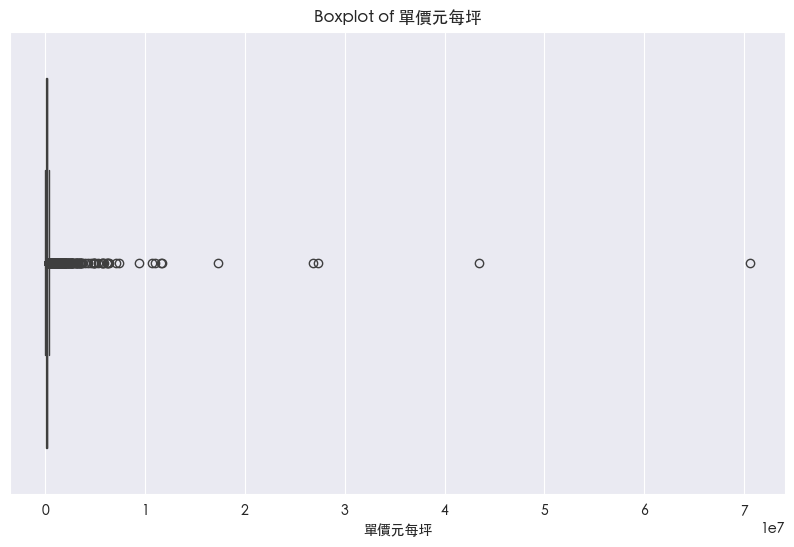

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

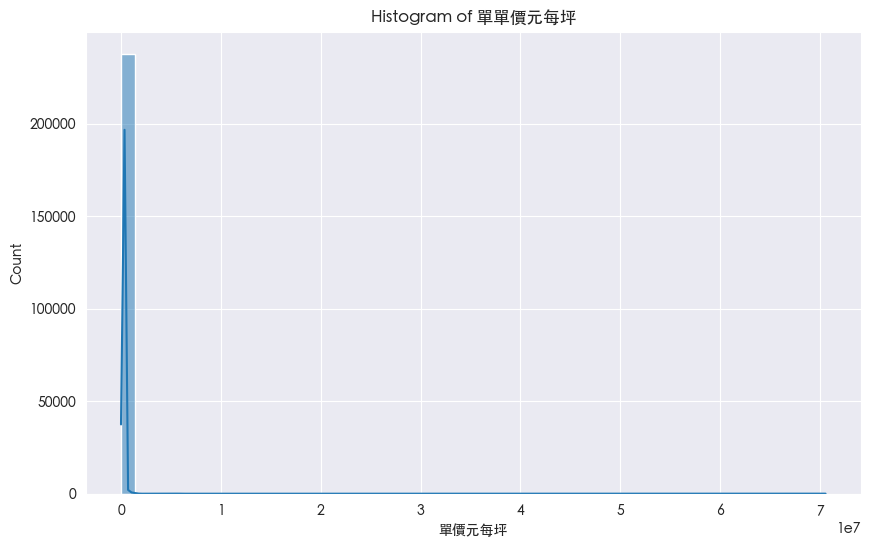

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單單價元每坪')
plt.show()

In [9]:
df_cleaned_unitPrice = df.drop(outliers_unitPrice.index)

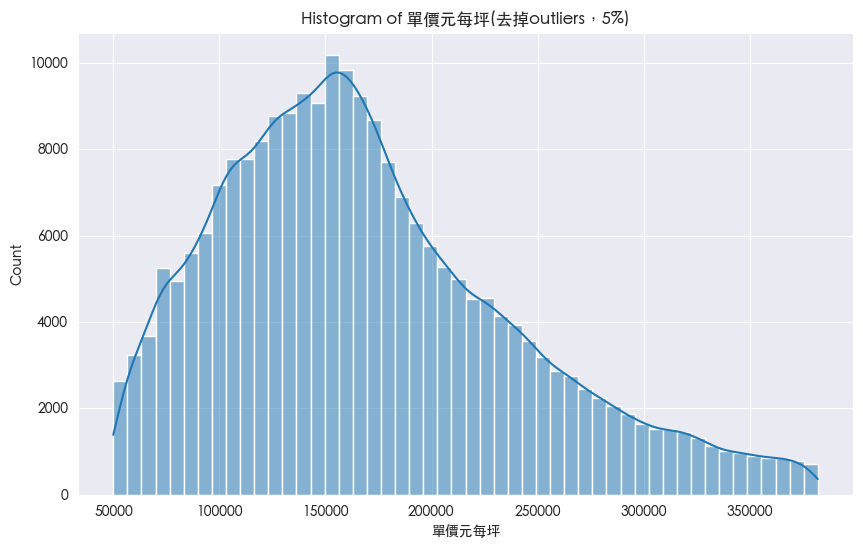

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_unitPrice['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉outliers，5%)')
plt.show()

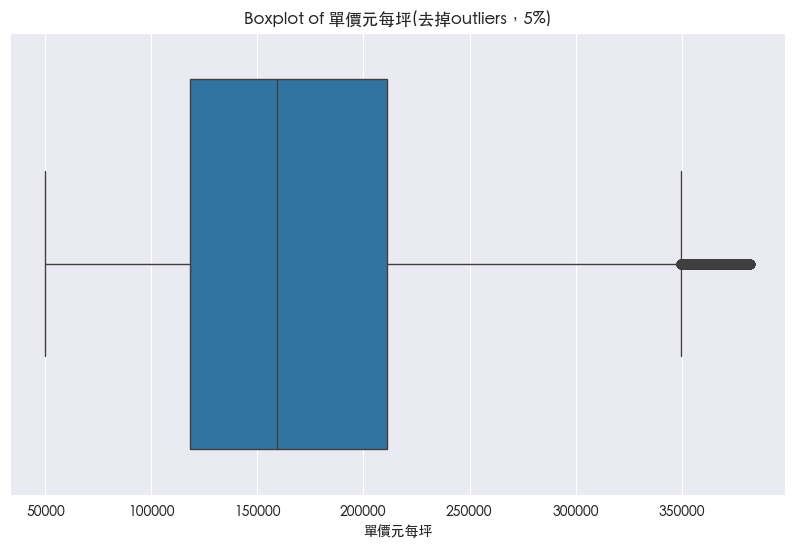

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned_unitPrice['單價元每坪'])
plt.title('Boxplot of 單價元每坪(去掉outliers，5%)')
plt.show()

In [12]:
df_cleaned_unitPrice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225942 entries, 0 to 237831
Data columns (total 51 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         225942 non-null  object 
 1   土地位置建物門牌     225942 non-null  object 
 2   交易年月日        225942 non-null  object 
 3   建築完成年月       203919 non-null  float64
 4   建物移轉總面積平方公尺  225942 non-null  float64
 5   有無管理組織       225942 non-null  object 
 6   總價元          225942 non-null  int64  
 7   單價元平方公尺      225942 non-null  float64
 8   備註           61341 non-null   object 
 9   編號           225942 non-null  object 
 10  緯度           225942 non-null  float64
 11  經度           225942 non-null  float64
 12  bad_count    225942 non-null  float64
 13  good_count   225942 non-null  float64
 14  建築型態清整       225942 non-null  object 
 15  陽台有無         225942 non-null  int64  
 16  是否含額外土地      225942 non-null  int64  
 17  建築型態_住商大樓    225942 non-null  int64  
 18  建築型態_公寓      225942 non-null 

In [13]:
df_cleaned_unitPrice.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_225942row_unitPrice_outlier_5percent.csv',index=False)